<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/Agrupamiento_mejorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-means Scratch – Demo completa
Iniciando KMeans: K=4, n_init=5

Inicialización 1/5
Iter   0 | SSE=127.4370 | shift=2.552773
Convergió en 3 iteraciones.
SSE=48.6338 | iters=4

Inicialización 2/5
Iter   0 | SSE=48.6338 | shift=0.755553
Convergió en 1 iteraciones.
SSE=48.6338 | iters=2

Inicialización 3/5
Iter   0 | SSE=48.6338 | shift=1.328924
Convergió en 1 iteraciones.
SSE=48.6338 | iters=2

Inicialización 4/5
Iter   0 | SSE=202.8004 | shift=1.541527
Convergió en 6 iteraciones.
SSE=48.6338 | iters=7

Inicialización 5/5
Iter   0 | SSE=275.0545 | shift=4.587454
Convergió en 3 iteraciones.
SSE=48.6338 | iters=4

Mejor SSE=48.6338


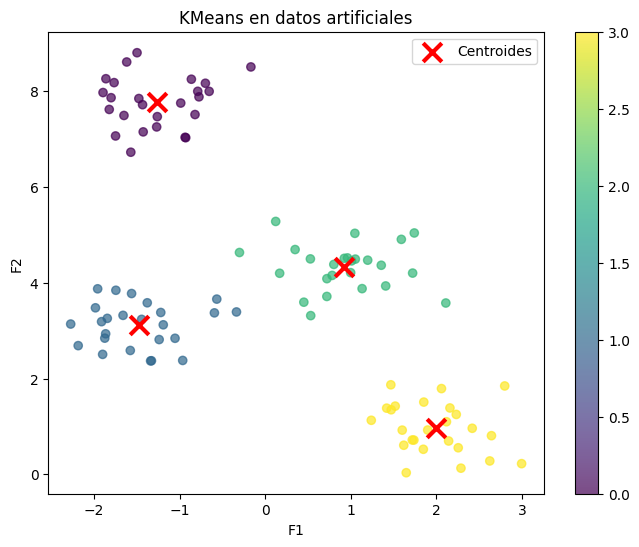

Evaluando k=1
Evaluando k=2
Evaluando k=3
Evaluando k=4
Evaluando k=5
Evaluando k=6
Evaluando k=7
Evaluando k=8


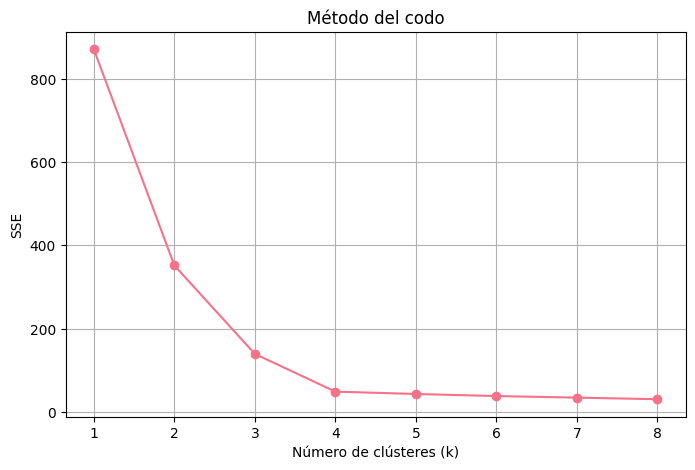

=== Selección de k (codo + silueta) ===
Evaluando k=1
Evaluando k=2
Evaluando k=3
Evaluando k=4
Evaluando k=5
Evaluando k=6
Evaluando k=7
Evaluando k=8


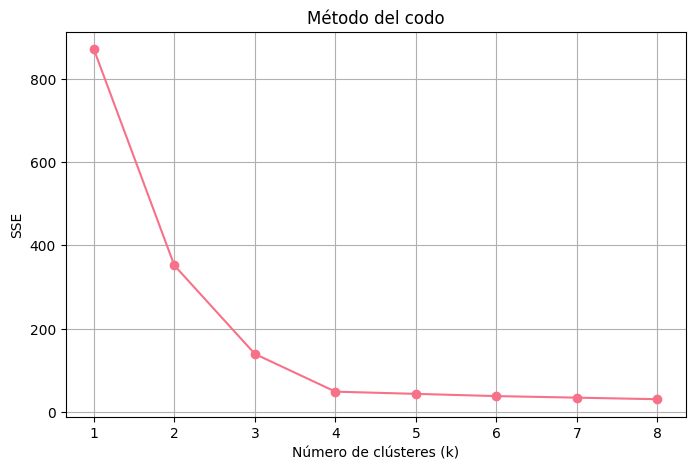

k=2 | silueta=0.570
k=3 | silueta=0.636
k=4 | silueta=0.708
k=5 | silueta=0.615
k=6 | silueta=0.507
k=7 | silueta=0.403
k=8 | silueta=0.353


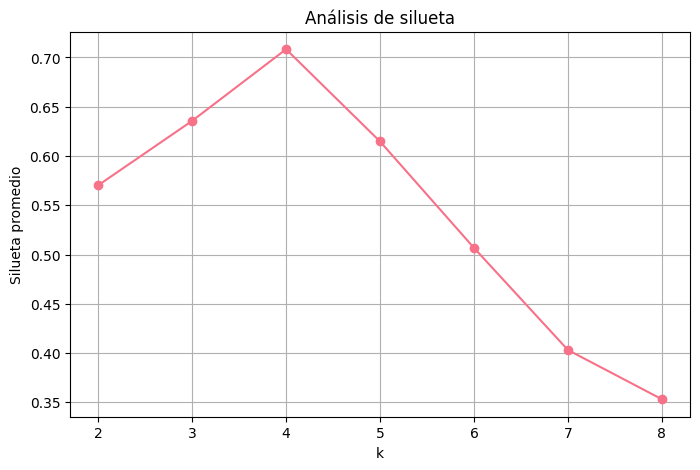

→ k óptimo (silueta): 4


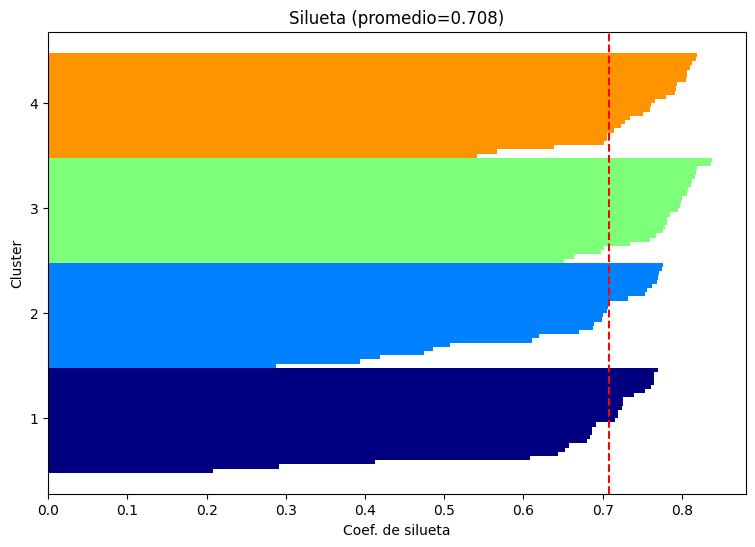

⚠️ No se encontró el CSV real. Usando datos sintéticos compatibles.
Varianza explicada PCA: [0.62627973 0.10661904]
=== Selección de k (codo + silueta) ===
Evaluando k=1
Evaluando k=2
Evaluando k=3
Evaluando k=4
Evaluando k=5
Evaluando k=6
Evaluando k=7
Evaluando k=8


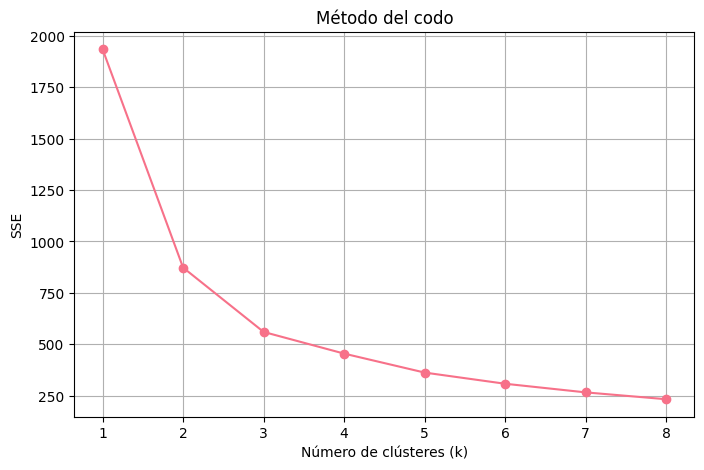

k=2 | silueta=0.441
k=3 | silueta=0.398
k=4 | silueta=0.345
k=5 | silueta=0.362
k=6 | silueta=0.357
k=7 | silueta=0.350
k=8 | silueta=0.343


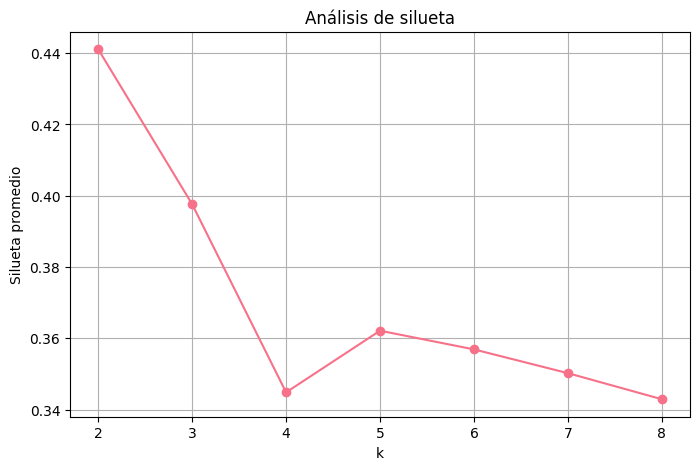

→ k óptimo (silueta): 2
Iniciando KMeans: K=2, n_init=10

Inicialización 1/10
Iter   0 | SSE=909.6055 | shift=1.172194
Convergió en 7 iteraciones.
SSE=872.7723 | iters=8

Inicialización 2/10
Iter   0 | SSE=1332.7547 | shift=1.920796
Iter  10 | SSE=872.7723 | shift=0.013224
Convergió en 11 iteraciones.
SSE=872.7723 | iters=12

Inicialización 3/10
Iter   0 | SSE=904.7640 | shift=1.817695
Convergió en 7 iteraciones.
SSE=872.7723 | iters=8

Inicialización 4/10
Iter   0 | SSE=1622.7784 | shift=2.058755
Iter  10 | SSE=873.1801 | shift=0.031510
Convergió en 16 iteraciones.
SSE=872.8729 | iters=17

Inicialización 5/10
Iter   0 | SSE=873.7632 | shift=2.280576
Convergió en 4 iteraciones.
SSE=872.8729 | iters=5

Inicialización 6/10
Iter   0 | SSE=1672.3023 | shift=2.883651
Convergió en 7 iteraciones.
SSE=872.8729 | iters=8

Inicialización 7/10
Iter   0 | SSE=1030.9351 | shift=1.825709
Convergió en 4 iteraciones.
SSE=872.8729 | iters=5

Inicialización 8/10
Iter   0 | SSE=1509.8851 | shift=2.028475

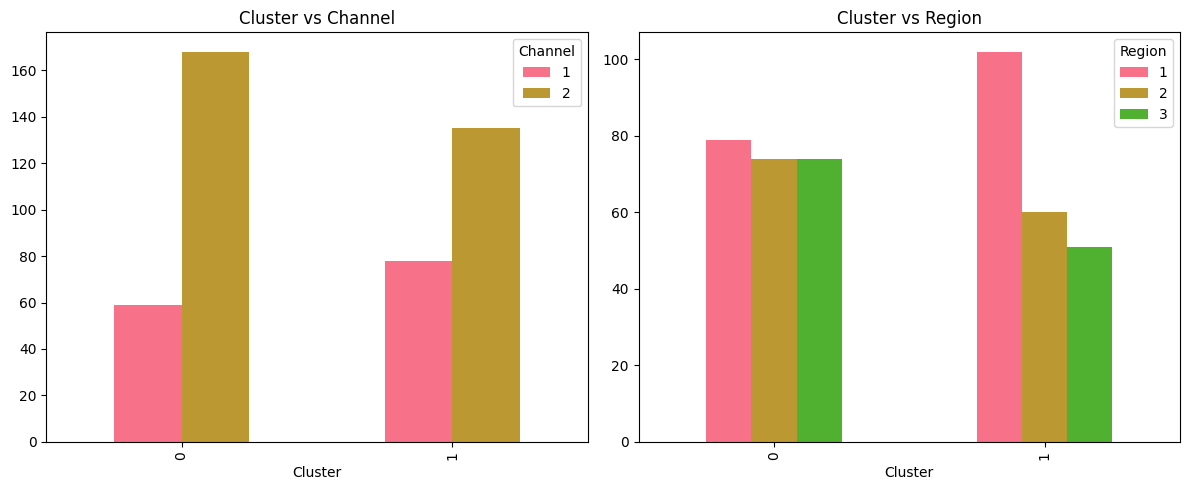


Gasto promedio por clúster:
           Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Cluster                                                                 
0        591.03  304.96   808.28  269.47            142.98         80.54
1        283.66  138.92   513.21  158.32             75.67         48.67

Resumen por clúster:
Cluster 0: 227 clientes | Total=2197 | Prom/cliente=10
Cluster 1: 213 clientes | Total=1218 | Prom/cliente=6


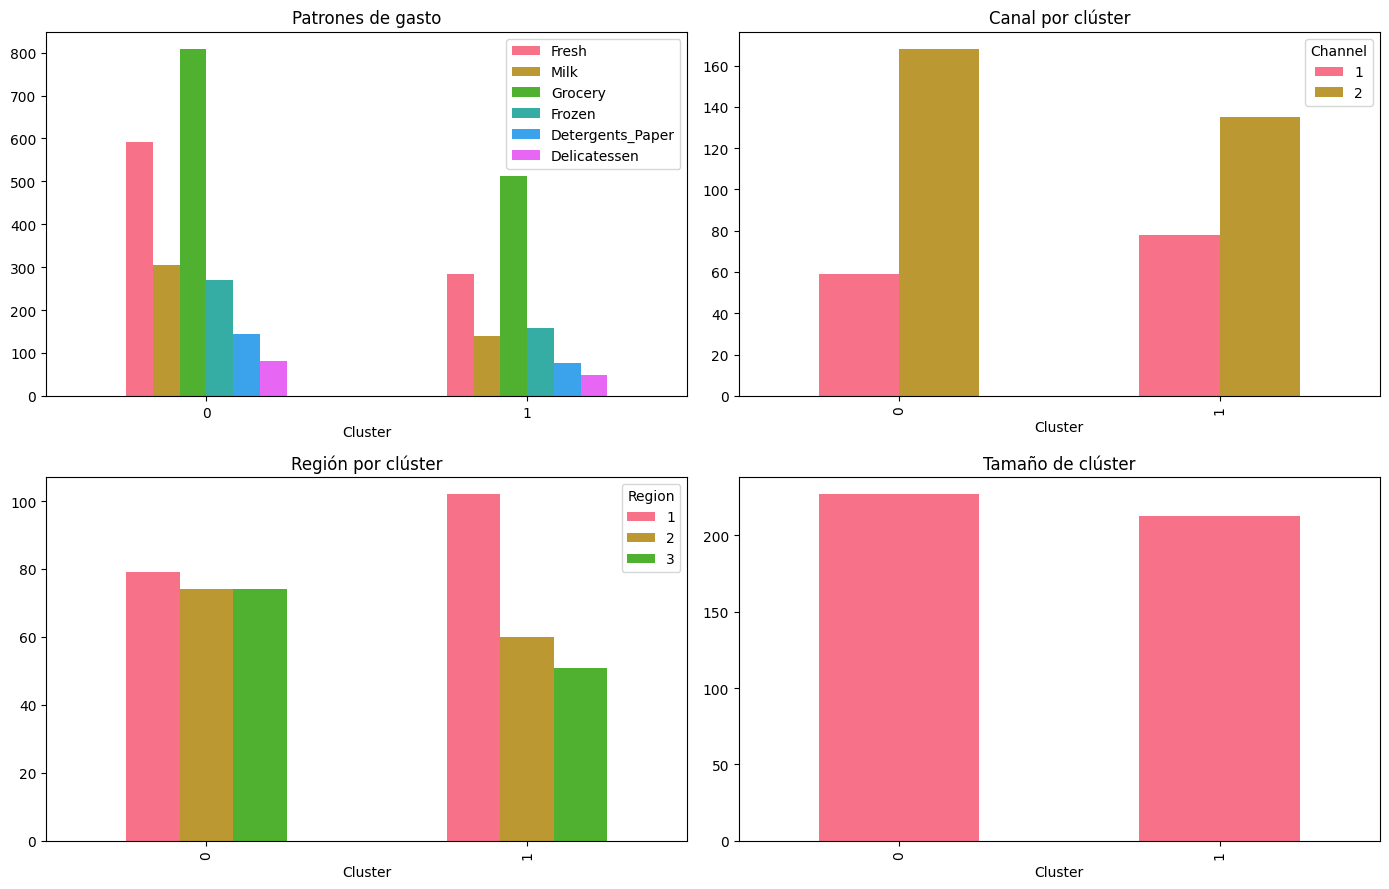


[DBSCAN] Pros: no requiere k, detecta outliers, formas arbitrarias. Contras: sensible a eps/min_samples, densidades distintas, alto costo en alta dimensión.
[t-SNE] Pros: gran visualización, preserva estructura local. Contras: no distancias globales, caro, resultados variables.
[LLE] Pros: preserva estructura local, útil en no linealidad. Contras: sensible a #vecinos, no preserva global, puede colapsar en datos ruidosos/pequeños.

=== t-SNE+DBSCAN vs PCA+KMeans ===
Varianza explicada PCA: [0.62627973 0.10661904] | SSE KMeans: 454.56
DBSCAN clusters: 0 | ruido: 440


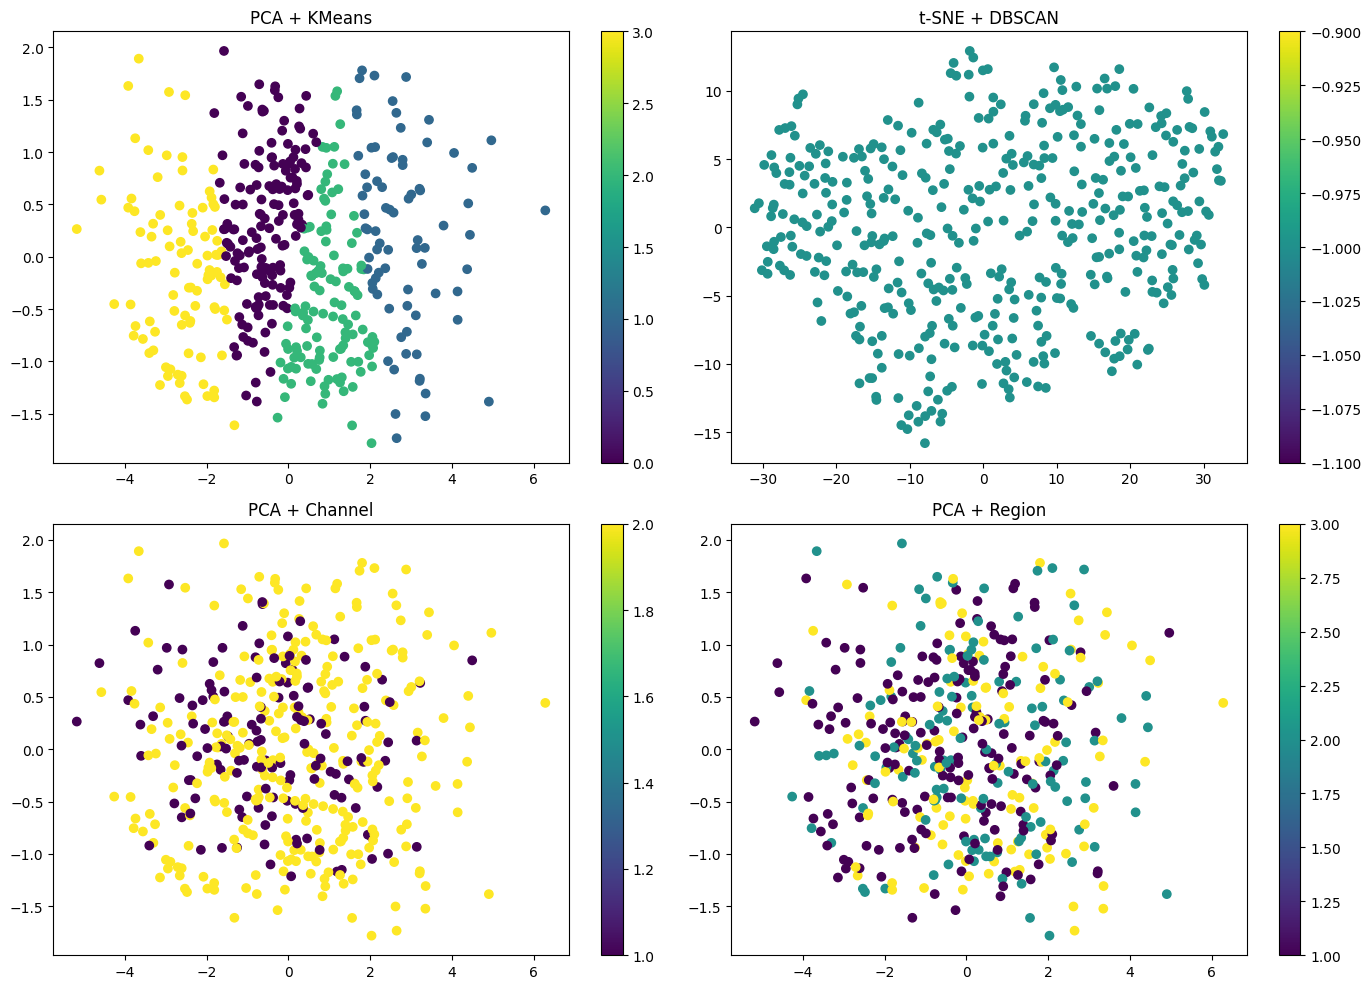


🎉 Listo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import os

plt.style.use('default')
sns.set_palette("husl")

# =========================
#  K-MEANS DESDE CERO
# =========================

class ScratchKMeans():
    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None
        self.labels = None
        self.sse = None
        self.is_fitted = False

    # --- P1: inicialización aleatoria de centroides ---
    def _initialize_centroids(self, X):
        n_samples = X.shape[0]
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        return X[idx].copy()

    # --- P2: SSE ---
    def _calculate_sse(self, X, centroids, labels):
        sse = 0.0
        for k in range(self.n_clusters):
            pts = X[labels == k]
            if len(pts) > 0:
                d2 = np.sum((pts - centroids[k]) ** 2, axis=1)
                sse += np.sum(d2)
        return sse

    # --- P3: asignación al centroide más cercano ---
    def _assign_clusters(self, X, centroids):
        # distancias (n_samples, n_clusters)
        dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        return np.argmin(dists, axis=1)

    # Utilidad: obtener punto más lejano a cualquier centroide (para clúster vacío)
    def _farthest_point(self, X, centroids):
        dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # (n, K)
        min_dist_to_any_centroid = dists.min(axis=1)  # (n,)
        return X[np.argmax(min_dist_to_any_centroid)]

    # --- P4: actualizar centroides (con manejo de clúster vacío) ---
    def _update_centroids(self, X, labels, prev_centroids):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            pts = X[labels == k]
            if len(pts) > 0:
                new_centroids[k] = pts.mean(axis=0)
            else:
                # REPARO: reubicar centroide vacío en punto más lejano al conjunto de centroides actuales
                candidate = self._farthest_point(X, prev_centroids)
                new_centroids[k] = candidate
                if self.verbose:
                    print(f"[Aviso] Clúster {k} vacío → centroide reubicado en el punto más lejano.")
        return new_centroids

    # --- P5: una corrida completa de KMeans ---
    def _fit_single_init(self, X):
        centroids = self._initialize_centroids(X)

        for it in range(self.max_iter):
            prev = centroids.copy()
            labels = self._assign_clusters(X, centroids)
            centroids = self._update_centroids(X, labels, prev)

            shift = np.linalg.norm(centroids - prev)
            if self.verbose and it % 10 == 0:
                tmp_sse = self._calculate_sse(X, centroids, labels)
                print(f"Iter {it:3d} | SSE={tmp_sse:.4f} | shift={shift:.6f}")
            if shift < self.tol:
                if self.verbose:
                    print(f"Convergió en {it} iteraciones.")
                break

        final_labels = self._assign_clusters(X, centroids)
        sse = self._calculate_sse(X, centroids, final_labels)
        return centroids, final_labels, sse, it + 1

    # --- P6: múltiples inicializaciones, elegir la mejor por SSE ---
    def fit(self, X):
        X = np.asarray(X)
        best = (None, None, float('inf'), None)  # (centroids, labels, sse, iters)

        if self.verbose:
            print(f"Iniciando KMeans: K={self.n_clusters}, n_init={self.n_init}")

        for run in range(self.n_init):
            if self.verbose:
                print(f"\nInicialización {run+1}/{self.n_init}")
            C, L, SSE, nit = self._fit_single_init(X)
            if self.verbose:
                print(f"SSE={SSE:.4f} | iters={nit}")
            if SSE < best[2]:
                best = (C.copy(), L.copy(), SSE, nit)

        self.centroids, self.labels, self.sse, _ = best
        self.is_fitted = True
        if self.verbose:
            print(f"\nMejor SSE={self.sse:.4f}")

    # --- P7: predicción ---
    def predict(self, X):
        if not self.is_fitted:
            raise ValueError("Primero ejecuta fit().")
        X = np.asarray(X)
        return self._assign_clusters(X, self.centroids)

    def get_sse(self):
        if not self.is_fitted:
            raise ValueError("Primero ejecuta fit().")
        return self.sse


# =========================
#  MÉTODO DEL CODO (P8)
# =========================
def elbow_method(X, max_k=10, verbose=False):
    ks = range(1, max_k + 1)
    sses = []
    for k in ks:
        if verbose: print(f"Evaluando k={k}")
        km = ScratchKMeans(n_clusters=k, n_init=10, verbose=False)
        km.fit(X)
        sses.append(km.get_sse())
    plt.figure(figsize=(8,5))
    plt.plot(list(ks), sses, 'o-')
    plt.xlabel('Número de clústeres (k)'); plt.ylabel('SSE')
    plt.title('Método del codo'); plt.grid(True); plt.show()
    return list(ks), sses

# =========================
#  SILUETA (P9)
# =========================
def calculate_silhouette_coefficients(X, labels):
    X = np.asarray(X); labels = np.asarray(labels)
    n = X.shape[0]; sil = np.zeros(n)
    unique = np.unique(labels)
    if len(unique) < 2: return sil, 0.0
    for i in range(n):
        same = X[labels == labels[i]]
        a = 0 if len(same) <= 1 else np.mean([np.linalg.norm(X[i]-p) for p in same if not np.array_equal(p, X[i])])
        b_vals = []
        for c in unique:
            if c == labels[i]: continue
            other = X[labels == c]
            if len(other) > 0:
                b_vals.append(np.mean([np.linalg.norm(X[i]-p) for p in other]))
        b = min(b_vals) if b_vals else 0
        sil[i] = 0 if max(a,b)==0 else (b - a)/max(a,b)
    return sil, sil.mean()

def plot_silhouette_diagram(X, labels, silhouette_vals, silhouette_avg):
    from matplotlib import cm
    n_clusters = len(np.unique(labels))
    cluster_labels = np.unique(labels)
    y_low = 0; yticks = []
    plt.figure(figsize=(9,6))
    for i, c in enumerate(cluster_labels):
        vals = np.sort(silhouette_vals[labels == c])
        y_high = y_low + len(vals)
        color = cm.jet(i / max(1,n_clusters))
        plt.barh(range(y_low, y_high), vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_low + y_high)/2)
        y_low = y_high
    plt.axvline(silhouette_avg, color='red', ls='--')
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel("Cluster"); plt.xlabel("Coef. de silueta")
    plt.title(f"Silueta (promedio={silhouette_avg:.3f})"); plt.show()

# =========================
#  DATASETS DE PRUEBA
# =========================
def create_sample_dataset():
    X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5,
                      shuffle=True, random_state=0)
    return X

def visualize_clusters(X, labels, centroids=None, title="K-means"):
    plt.figure(figsize=(8,6))
    sc = plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(sc)
    if centroids is not None:
        plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=180, lw=3, label='Centroides')
        plt.legend()
    plt.title(title); plt.xlabel('F1'); plt.ylabel('F2'); plt.show()

# =========================
#  WHOLESALE CUSTOMERS
#    (P10–P12, P14)
# =========================
def load_wholesale_data(path_candidates=None):
    """
    Intenta cargar el dataset real de UCI.
    Columnas esperadas:
    ['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
    Si no se encuentra, genera datos sintéticos compatibles (fallback).
    """
    if path_candidates is None:
        path_candidates = [
            'Wholesale customers data.csv',  # nombre más común
            'Wholesale Customers Data.csv',
            'data.csv',
            '/content/Wholesale customers data.csv'
        ]

    for p in path_candidates:
        if os.path.exists(p):
            try:
                df = pd.read_csv(p)
                # normalizar nombres si vienen distintos
                cols = [c.strip().replace('Detergents_Paper','Detergents_Paper') for c in df.columns]
                df.columns = cols
                needed = ['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
                missing = [c for c in needed if c not in df.columns]
                if len(missing)==0:
                    print(f"✅ Dataset real cargado desde: {p}")
                    return df[needed].copy()
            except Exception as e:
                print(f"[Aviso] Problema leyendo {p}: {e}")

    # Fallback sintético
    print("⚠️ No se encontró el CSV real. Usando datos sintéticos compatibles.")
    np.random.seed(42)
    n = 440
    channel = np.random.choice([1,2], n, p=[0.3,0.7])
    region  = np.random.choice([1,2,3], n, p=[0.4,0.3,0.3])
    data=[]
    for i in range(n):
        base = 1000 + channel[i]*500 + region[i]*200
        noise = np.random.normal(0,200)
        fresh = max(0, base*np.random.uniform(0.1,0.3) + noise)
        milk  = max(0, base*np.random.uniform(0.05,0.15) + noise*0.5)
        groc  = max(0, base*np.random.uniform(0.2,0.4) + noise*0.8)
        froz  = max(0, base*np.random.uniform(0.05,0.15) + noise*0.3)
        det   = max(0, base*np.random.uniform(0.02,0.08) + noise*0.2)
        deli  = max(0, base*np.random.uniform(0.01,0.05) + noise*0.1)
        data.append([channel[i], region[i], fresh, milk, groc, froz, det, deli])
    return pd.DataFrame(data, columns=['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])

def analyze_optimal_k(X):
    print("=== Selección de k (codo + silueta) ===")
    elbow_method(X, max_k=8, verbose=True)

    sil_scores=[]
    for k in range(2,9):
        km = ScratchKMeans(n_clusters=k, n_init=10)
        km.fit(X)
        labels = km.predict(X)
        _, sil_avg = calculate_silhouette_coefficients(X, labels)
        sil_scores.append(sil_avg)
        print(f"k={k} | silueta={sil_avg:.3f}")

    plt.figure(figsize=(8,5))
    plt.plot(range(2,9), sil_scores, 'o-'); plt.grid(True)
    plt.xlabel('k'); plt.ylabel('Silueta promedio'); plt.title('Análisis de silueta'); plt.show()

    best_k = list(range(2,9))[int(np.argmax(sil_scores))]
    print(f"→ k óptimo (silueta): {best_k}")
    return best_k

def compare_with_known_groups(df, labels):
    dfc = df.copy()
    dfc['Cluster'] = labels
    print("\nDistribución por Canal:")
    print(pd.crosstab(dfc['Cluster'], dfc['Channel']))
    print("\nDistribución por Región:")
    print(pd.crosstab(dfc['Cluster'], dfc['Region']))

    fig, ax = plt.subplots(1,2, figsize=(12,5))
    pd.crosstab(dfc['Cluster'], dfc['Channel']).plot(kind='bar', ax=ax[0], title='Cluster vs Channel')
    pd.crosstab(dfc['Cluster'], dfc['Region']).plot(kind='bar', ax=ax[1], title='Cluster vs Region')
    plt.tight_layout(); plt.show()
    return dfc

def analyze_cluster_characteristics(df_with_clusters):
    spend_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
    stats = df_with_clusters.groupby('Cluster')[spend_cols].mean().round(2)
    print("\nGasto promedio por clúster:\n", stats)
    sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    stats['Total_Spending'] = stats.sum(axis=1)
    stats['Cluster_Size'] = sizes
    print("\nResumen por clúster:")
    for c in stats.index:
        tot = stats.loc[c,'Total_Spending']; sz = stats.loc[c,'Cluster_Size']
        print(f"Cluster {c}: {sz} clientes | Total={tot:.0f} | Prom/cliente={tot/sz:.0f}")

    plt.figure(figsize=(14,9))
    plt.subplot(2,2,1); stats[spend_cols].plot(kind='bar', ax=plt.gca(), title='Patrones de gasto'); plt.xticks(rotation=0)
    plt.subplot(2,2,2); df_with_clusters.groupby('Cluster')['Channel'].value_counts().unstack().plot(kind='bar', ax=plt.gca(), title='Canal por clúster')
    plt.subplot(2,2,3); df_with_clusters.groupby('Cluster')['Region'].value_counts().unstack().plot(kind='bar', ax=plt.gca(), title='Región por clúster')
    plt.subplot(2,2,4); sizes.plot(kind='bar', ax=plt.gca(), title='Tamaño de clúster')
    plt.tight_layout(); plt.show()
    return stats

def analyze_other_methods():
    print("\n[DBSCAN] Pros: no requiere k, detecta outliers, formas arbitrarias. Contras: sensible a eps/min_samples, densidades distintas, alto costo en alta dimensión.")
    print("[t-SNE] Pros: gran visualización, preserva estructura local. Contras: no distancias globales, caro, resultados variables.")
    print("[LLE] Pros: preserva estructura local, útil en no linealidad. Contras: sensible a #vecinos, no preserva global, puede colapsar en datos ruidosos/pequeños.")

def compare_tsne_dbscan_with_pca_kmeans(X_scaled, df):
    print("\n=== t-SNE+DBSCAN vs PCA+KMeans ===")
    pca = PCA(n_components=2); X_pca = pca.fit_transform(X_scaled)
    km = ScratchKMeans(n_clusters=4, n_init=10); km.fit(X_pca); lab_km = km.predict(X_pca)
    print(f"Varianza explicada PCA: {pca.explained_variance_ratio_} | SSE KMeans: {km.get_sse():.2f}")

    tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')
    X_tsne = tsne.fit_transform(X_scaled)
    db = DBSCAN(eps=0.5, min_samples=5); lab_db = db.fit_predict(X_tsne)
    n_db = len(set(lab_db)) - (1 if -1 in lab_db else 0); n_noise = list(lab_db).count(-1)
    print(f"DBSCAN clusters: {n_db} | ruido: {n_noise}")

    fig, ax = plt.subplots(2,2, figsize=(14,10))
    s1 = ax[0,0].scatter(X_pca[:,0], X_pca[:,1], c=lab_km, cmap='viridis'); ax[0,0].set_title('PCA + KMeans'); plt.colorbar(s1, ax=ax[0,0])
    s2 = ax[0,1].scatter(X_tsne[:,0], X_tsne[:,1], c=lab_db, cmap='viridis'); ax[0,1].set_title('t-SNE + DBSCAN'); plt.colorbar(s2, ax=ax[0,1])
    s3 = ax[1,0].scatter(X_pca[:,0], X_pca[:,1], c=df['Channel'], cmap='viridis'); ax[1,0].set_title('PCA + Channel'); plt.colorbar(s3, ax=ax[1,0])
    s4 = ax[1,1].scatter(X_pca[:,0], X_pca[:,1], c=df['Region'], cmap='viridis'); ax[1,1].set_title('PCA + Region'); plt.colorbar(s4, ax=ax[1,1])
    plt.tight_layout(); plt.show()
    return X_pca, X_tsne, lab_km, lab_db

# =========================
#  MAIN DEMO
# =========================
def main():
    print("K-means Scratch – Demo completa")

    # Demo con datos artificiales
    X_art = create_sample_dataset()
    km = ScratchKMeans(n_clusters=4, n_init=5, verbose=True)
    km.fit(X_art)
    labels = km.predict(X_art)
    visualize_clusters(X_art, labels, km.centroids, "KMeans en datos artificiales")
    elbow_method(X_art, max_k=8, verbose=True)
    best_k = analyze_optimal_k(X_art)
    km2 = ScratchKMeans(n_clusters=best_k, n_init=10, verbose=False)
    km2.fit(X_art)
    lab2 = km2.predict(X_art)
    sil_vals, sil_avg = calculate_silhouette_coefficients(X_art, lab2)
    plot_silhouette_diagram(X_art, lab2, sil_vals, sil_avg)

    # Wholesale (real si está el CSV; si no, sintético)
    df = load_wholesale_data()
    spend_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
    X_wh = df[spend_cols].values
    scaler = StandardScaler()
    X_wh_scaled = scaler.fit_transform(X_wh)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_wh_scaled)
    print("Varianza explicada PCA:", pca.explained_variance_ratio_)

    k_wh = analyze_optimal_k(X_pca)
    km_wh = ScratchKMeans(n_clusters=k_wh, n_init=10, verbose=True)
    km_wh.fit(X_pca)
    lab_wh = km_wh.predict(X_pca)

    df_clusters = compare_with_known_groups(df, lab_wh)
    _ = analyze_cluster_characteristics(df_clusters)
    analyze_other_methods()
    compare_tsne_dbscan_with_pca_kmeans(X_wh_scaled, df)

    print("\n🎉 Listo.")

if __name__ == "__main__":
    main()
